In [1]:
# 📦 Data manipulation
import pandas as pd
import numpy as np 

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# ⚙️ Preprocessing
from sklearn.preprocessing import StandardScaler, label_binarize

In [3]:
# 🧪 Model selection & evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    classification_report,
    confusion_matrix,
    roc_curve, 
    auc
)

In [4]:
# 🧠 Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier


In [5]:
# ⚖️ Handling imbalance
from imblearn.over_sampling import SMOTE
from collections import Counter

In [6]:
data =  pd.read_csv("Chapter 3 - wine.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Data Visualization

In [7]:
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [8]:
data.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

<Axes: ylabel='quality'>

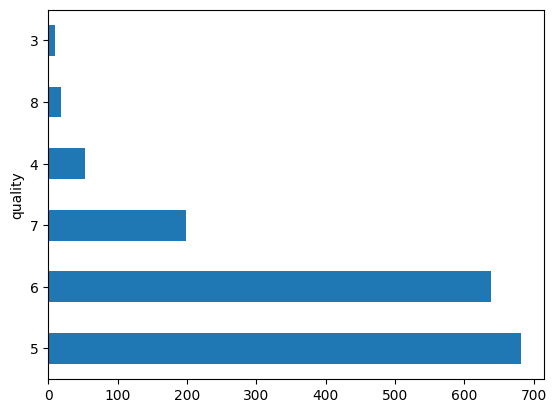

In [9]:
data["quality"].value_counts().plot(kind = "barh")

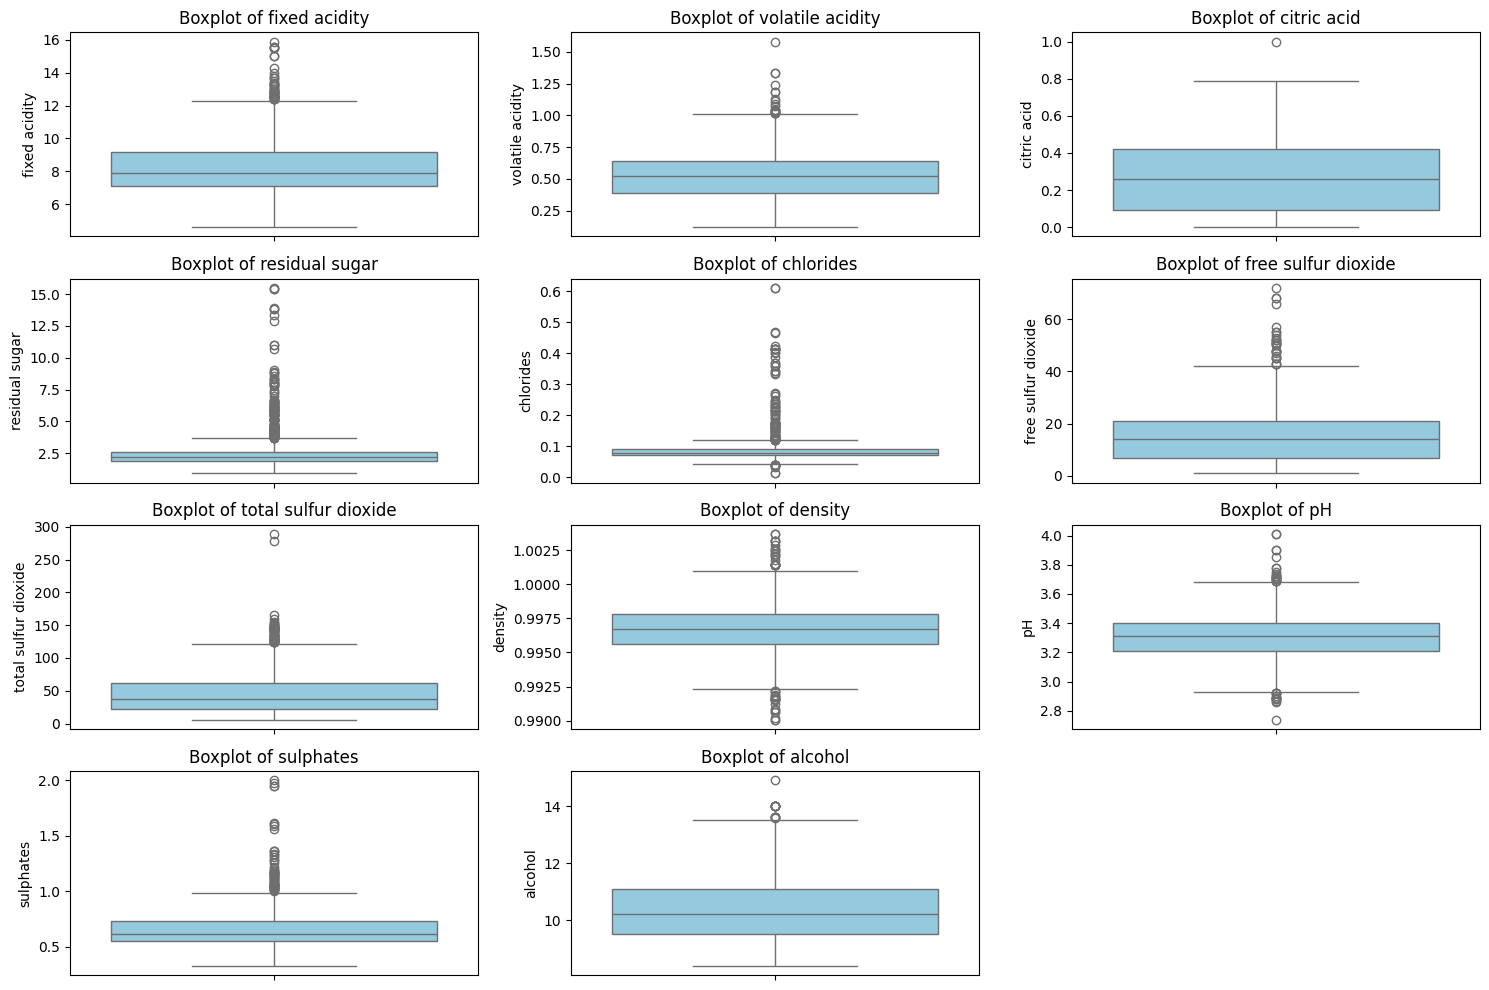

In [10]:
numeric_features = data.drop('quality', axis=1).columns  # exclude target if needed

# Set up the plot size
plt.figure(figsize=(15, 10))

# Loop through features and plot boxplots
for i, col in enumerate(numeric_features, 1):
    plt.subplot((len(numeric_features) + 2) // 3, 3, i)  # auto grid layout
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

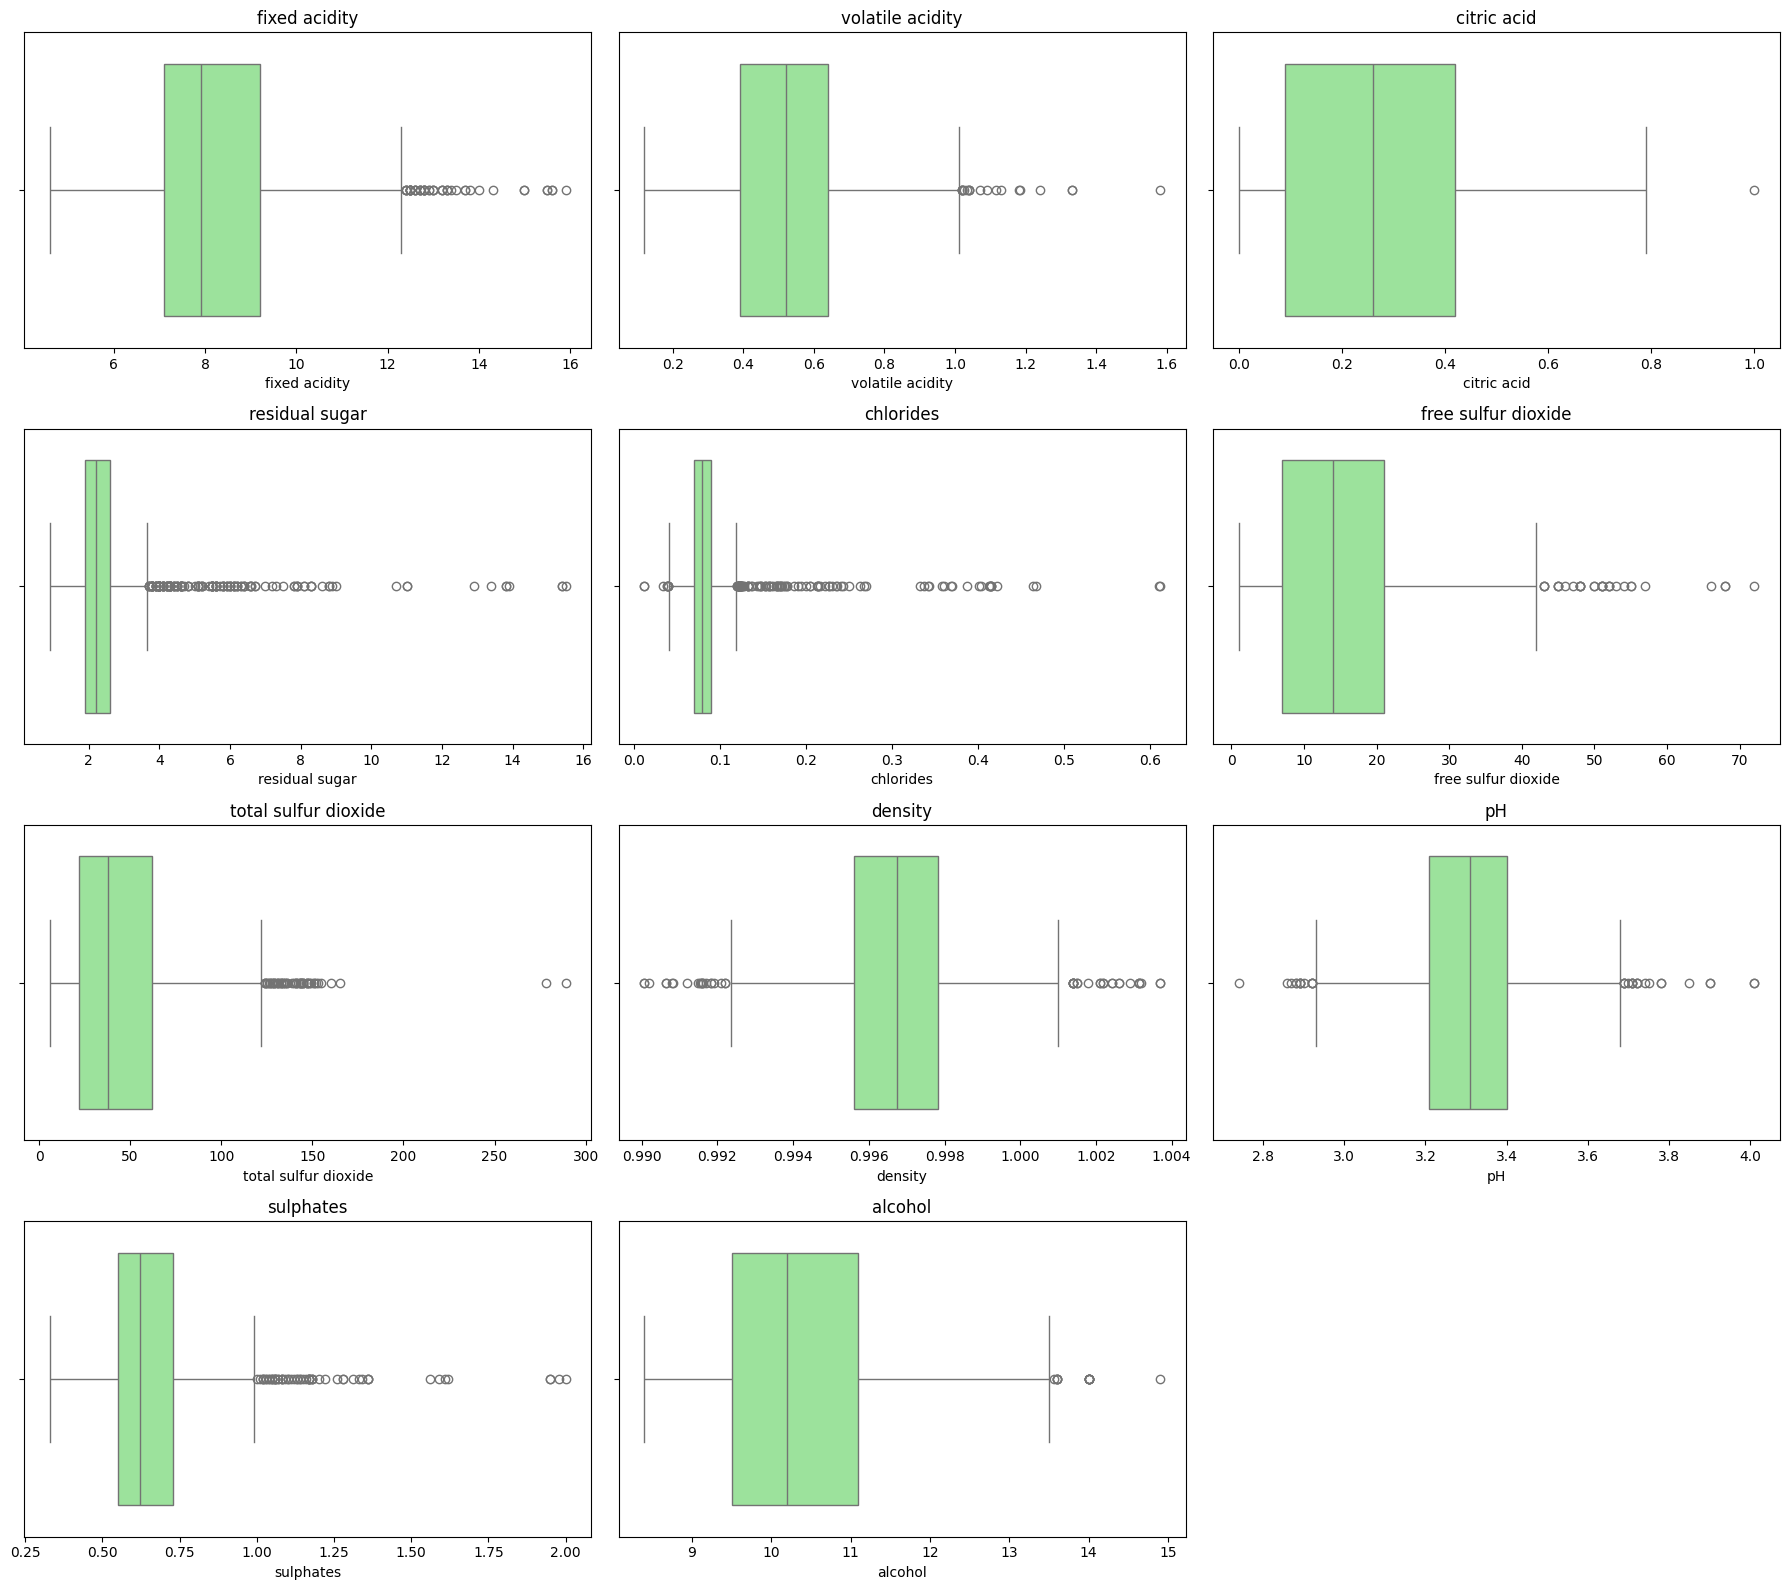

In [11]:
features = data.drop('quality', axis=1).columns

# Set up the figure
num_features = len(features)
cols = 3  # Number of plots per row
rows = (num_features + cols - 1) // cols  # Ceiling division

plt.figure(figsize=(6 * cols, 4 * rows))

# Plot each feature horizontally
for i, col in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=data[col], color='lightgreen', orient='h')
    plt.title(f'{col}', fontsize=12)
    plt.tight_layout()

plt.show()

In [12]:
data.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [13]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
data.count().isnull()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<Axes: >

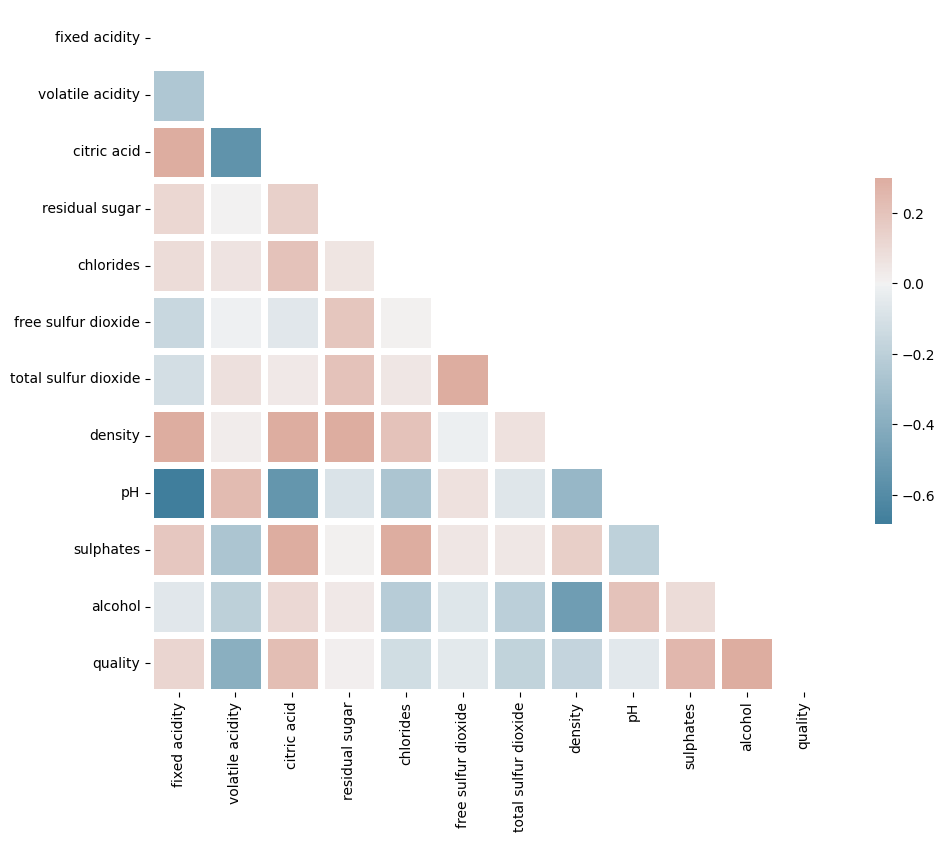

In [15]:
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr , dtype=bool))
f , ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=5, cbar_kws={"shrink": .5} )
#corrilation heat map code


### Data preprocessing

#### Remove outlaiers

In [16]:
def remove_outliers_iqr(df, features, multiplier=1.5):
    df_clean = df.copy()
    
    for col in features:
        Q1 = df_clean[col].quantile(0.25) # 25th percentile (lower quartile)
        Q3 = df_clean[col].quantile(0.75) # 75th percentile (upper quartile)
        IQR = Q3 - Q1                     # Interquartile Range (middle 50%)


        # Define bounds
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Keep only rows within bounds
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean


In [17]:
data = remove_outliers_iqr(data , features  )
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


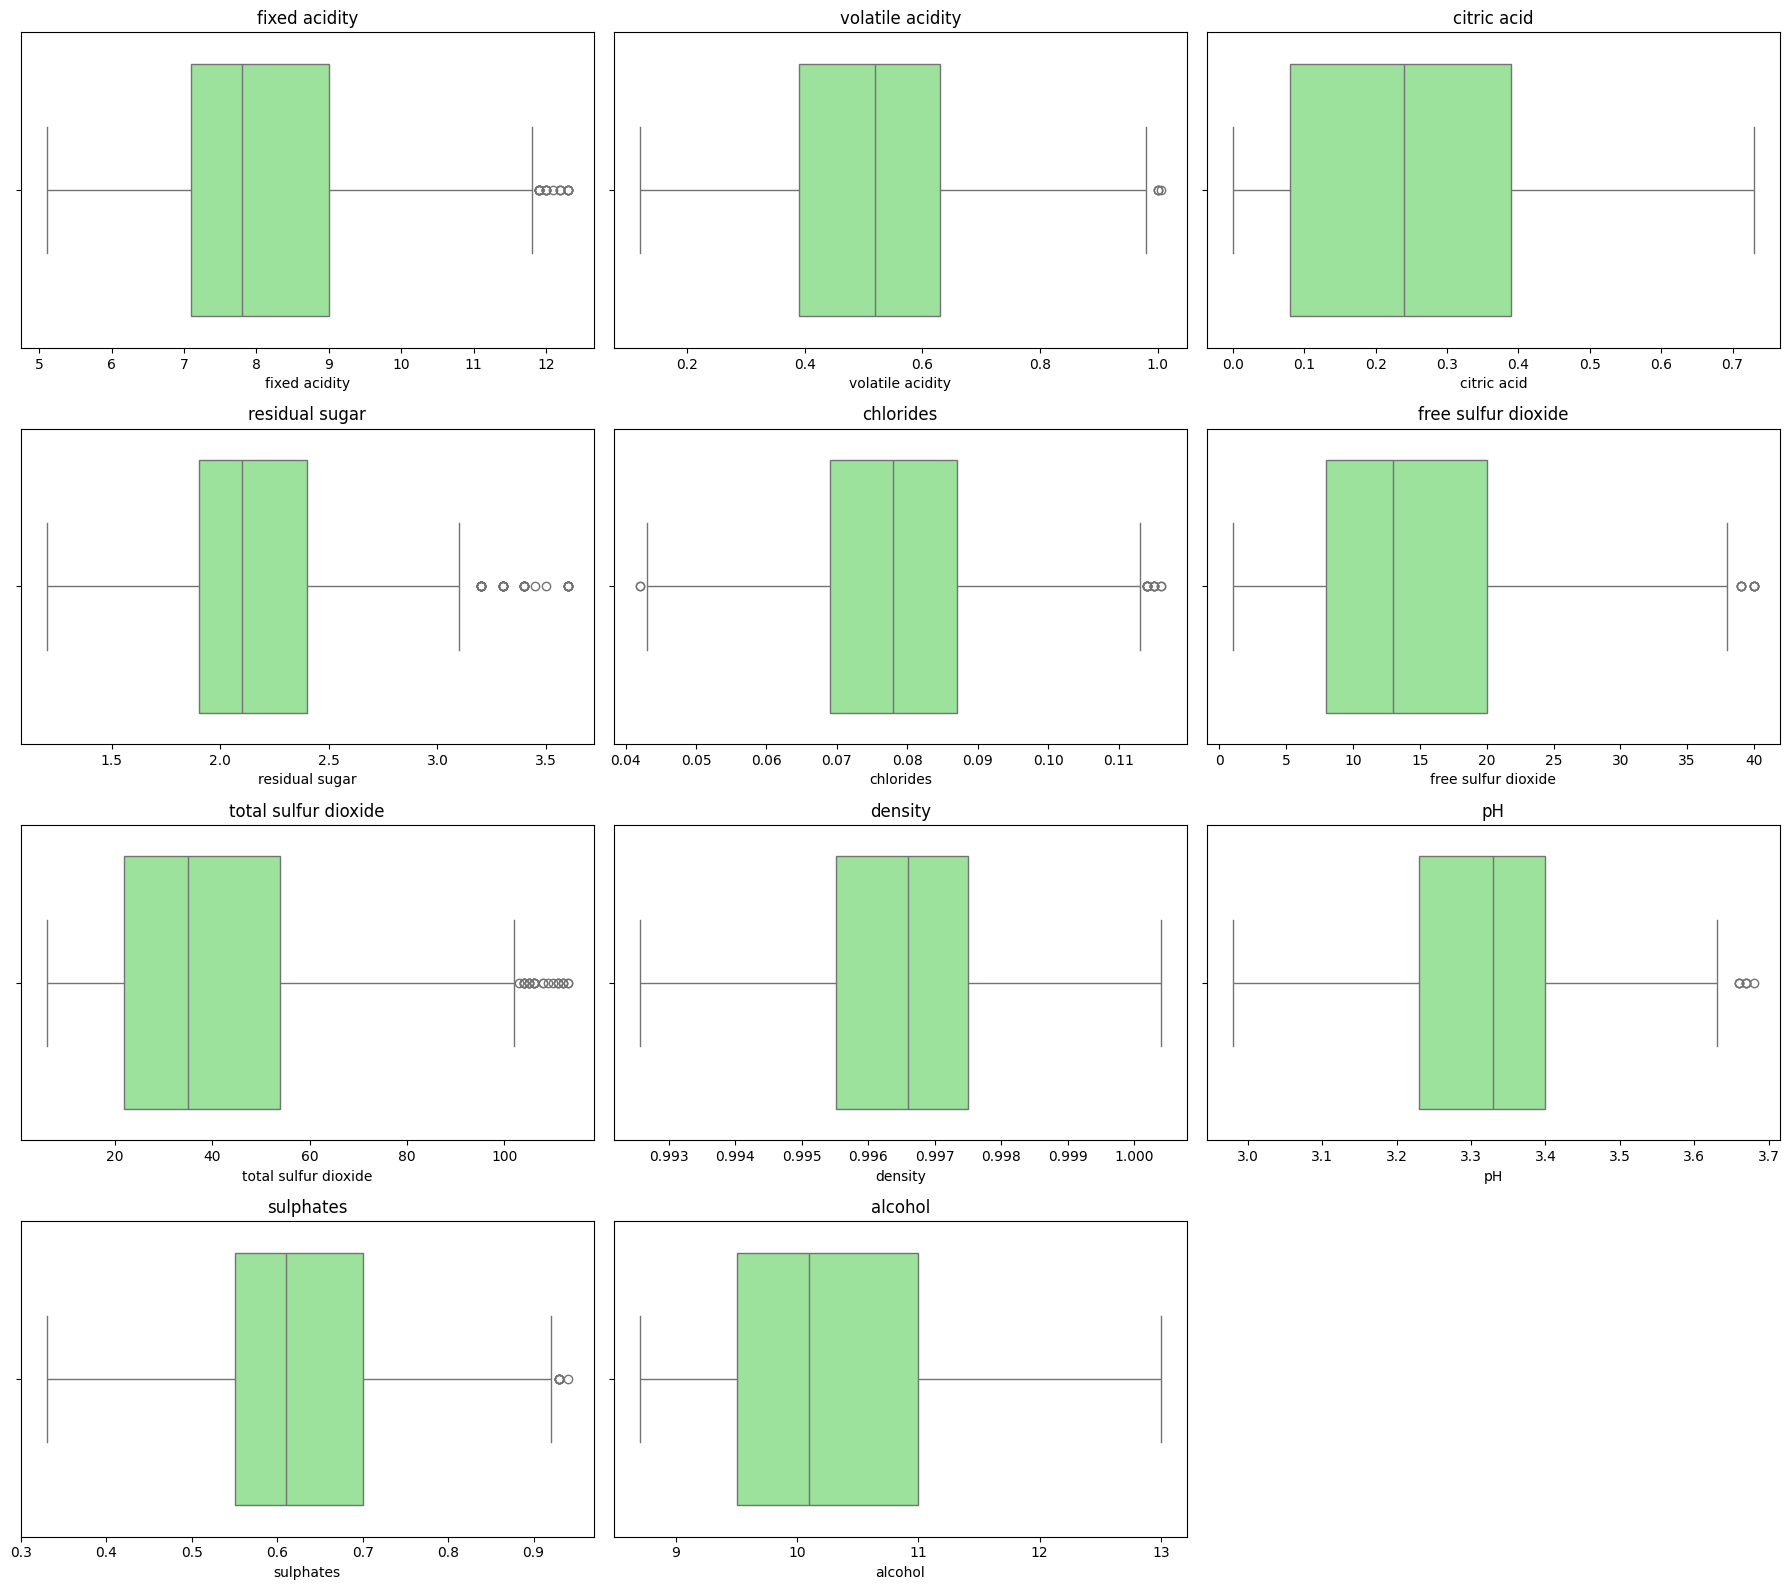

In [18]:
features = data.drop('quality', axis=1).columns

# Set up the figure
num_features = len(features)
cols = 3  # Number of plots per row
rows = (num_features + cols - 1) // cols  # Ceiling division

plt.figure(figsize=(6 * cols, 4 * rows))

# Plot each feature horizontally
for i, col in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=data[col], color='lightgreen', orient='h')
    plt.title(f'{col}', fontsize=12)
    plt.tight_layout()

plt.show()

#### Drop unimportant columns 

In [19]:
#data = data.drop('fixed acidity' , axis= 1) #removing coulumn resulting in worse predictoin result
#data 

#### Scaling data

In [20]:
scaler = StandardScaler()

scaled_data = data.copy()
scaled_data = scaled_data.drop('quality', axis=1)
X_scaled = scaler.fit_transform(scaled_data)

#### Reasmple dataset

In [21]:
# Create a SMOTE object
smote = SMOTE( sampling_strategy={3: 100, 8: 180, 4: 530, 7: 300 }  , k_neighbors=6, random_state=42)# Only bring class 0 to 400 samples and class 2 to 600

# Apply SMOTE to training data
X_resample, y_resampled = smote.fit_resample(scaled_data, y)

print("Resampled class distribution:", Counter(y_resampled))
"""
5    681
6    638
7    199
4     53
8     18
3     10"""

NameError: name 'y' is not defined

### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resampled, test_size=0.2, stratify=y_resampled,  random_state=42)

### Support victor machine


In [ ]:
svc_clf = SVC() #creating Classifier object  

svc_clf.fit(X_train , y_train)

SVC()

In [ ]:
svc_clf_predicions = svc_clf.predict(X_test) #We take the trained model (svc_clf) and use it to predict labels for scaled_X_test
                                                    #The trained model is now used to predict labels for scaled_X_test
svc_clf_predicions


array([6, 4, 6, 6, 4, 4, 4, 4, 6, 5, 6, 5, 4, 6, 4, 5, 4, 6, 5, 4, 6, 5,
       6, 6, 4, 4, 5, 4, 4, 6, 4, 6, 6, 5, 5, 6, 6, 5, 6, 4, 4, 6, 6, 5,
       4, 5, 6, 6, 6, 5, 6, 4, 6, 6, 4, 5, 5, 5, 5, 6, 6, 4, 6, 4, 6, 4,
       4, 5, 6, 6, 4, 6, 6, 6, 5, 5, 6, 6, 4, 5, 6, 6, 4, 4, 4, 4, 5, 6,
       6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 4, 5, 5, 4, 5, 6, 4, 4, 6, 5,
       5, 4, 4, 4, 6, 5, 6, 6, 5, 6, 5, 5, 6, 4, 6, 6, 6, 5, 5, 5, 5, 4,
       6, 5, 4, 6, 6, 6, 6, 6, 5, 6, 4, 5, 4, 5, 4, 6, 4, 4, 4, 6, 4, 6,
       6, 5, 6, 6, 4, 4, 6, 6, 4, 4, 6, 6, 6, 4, 6, 4, 4, 6, 4, 6, 6, 4,
       5, 4, 4, 4, 6, 6, 6, 5, 6, 4, 5, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 4,
       6, 6, 5, 6, 6, 6, 5, 5, 6, 4, 5, 4, 6, 4, 4, 6, 5, 6, 5, 4, 6, 4,
       4, 4, 4, 5, 6, 4, 5, 6, 4, 5, 4, 4, 5, 4, 6, 4, 5, 4, 6, 6, 4, 5,
       6, 5, 5, 5, 4, 4, 4, 4, 6, 6, 4, 5, 4, 6, 6, 6, 5, 5, 5, 6, 4, 4,
       6, 4, 6, 6, 6, 5, 6, 4, 5, 4, 6, 4, 6, 4, 4, 6, 6, 6, 5, 4, 6, 5,
       4, 5, 5, 4, 4, 6, 4, 6, 6, 5, 6, 5, 6, 6, 4,

In [ ]:
print(classification_report(svc_clf_predicions,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.67      0.47      0.55       151
           5       0.48      0.48      0.48        97
           6       0.52      0.29      0.37       167
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.40       415
   macro avg       0.28      0.21      0.23       415
weighted avg       0.56      0.40      0.46       415



c:\Users\AFRAAD-PC1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AFRAAD-PC1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AFRAAD-PC1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

### Random Forest

#### Hyperparameter grid

In [ ]:
#Define the Hyperparameter Grid
param_grid  =  [    
    # Try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    
    # Try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

#### Grid search

In [ ]:
rfc = RandomForestClassifier(random_state= 42) #initializes a RandomForestClassifier() with default parameters.
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring= 'accuracy',return_train_score = True) #GridSearchCV is used to find the best hyperparameters by trying all possible combinations.
                                                                                               # cv=5: Performs 5-fold cross-validation (splits data into 5 parts and trains on 4 while testing on 1, rotating through).
                                                                                               #Since we have 18 hyperparameter combinations and 5-fold cross-validation,→ Total training runs = 18 × 5 = 90
grid_search.fit(X_train,y_train )


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

#### Best model and evaluation

In [ ]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_features=4, n_estimators=30, random_state=42)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
y_test.value_counts()

quality
4    106
5     98
6     95
7     60
8     36
3     20
Name: count, dtype: int64

In [ ]:

rfc_grid_predicions = best_model.predict(X_test) 
rfc_grid_predicions

array([7, 4, 7, 5, 4, 4, 6, 7, 6, 5, 6, 5, 7, 3, 6, 6, 8, 7, 5, 5, 7, 4,
       8, 5, 7, 4, 4, 3, 5, 7, 6, 7, 7, 5, 7, 8, 5, 5, 6, 4, 4, 4, 6, 6,
       4, 5, 6, 5, 7, 5, 6, 5, 3, 6, 5, 5, 6, 5, 4, 6, 5, 4, 8, 6, 6, 6,
       4, 5, 4, 8, 4, 4, 7, 7, 5, 5, 6, 6, 4, 5, 5, 6, 5, 4, 7, 8, 5, 5,
       6, 5, 6, 6, 5, 7, 5, 5, 6, 4, 6, 4, 8, 5, 5, 4, 5, 7, 8, 5, 7, 5,
       5, 4, 6, 4, 5, 5, 7, 7, 5, 7, 5, 5, 6, 4, 6, 5, 8, 5, 4, 7, 6, 4,
       6, 6, 7, 5, 4, 7, 8, 7, 5, 6, 4, 4, 8, 5, 4, 5, 6, 4, 4, 3, 4, 8,
       4, 5, 5, 4, 7, 8, 6, 6, 4, 4, 5, 8, 5, 4, 5, 4, 4, 6, 6, 7, 5, 4,
       5, 3, 3, 5, 7, 7, 5, 4, 6, 5, 4, 4, 5, 4, 4, 7, 7, 5, 7, 6, 5, 4,
       8, 8, 5, 8, 7, 4, 5, 4, 6, 6, 4, 4, 7, 8, 4, 6, 7, 4, 5, 7, 7, 5,
       4, 7, 4, 6, 7, 4, 6, 8, 4, 5, 7, 7, 5, 5, 8, 5, 7, 5, 3, 3, 4, 4,
       5, 4, 5, 6, 7, 4, 5, 4, 4, 7, 7, 5, 4, 5, 7, 3, 4, 6, 5, 7, 4, 8,
       3, 4, 3, 3, 7, 5, 5, 4, 5, 4, 4, 8, 6, 4, 4, 8, 3, 7, 5, 8, 6, 4,
       4, 6, 6, 5, 5, 5, 4, 4, 7, 6, 8, 4, 7, 8, 4,

In [ ]:
accuracy_score( y_test , rfc_grid_predicions) 

0.8361445783132531

In [ ]:
print(classification_report(rfc_grid_predicions,y_test))

              precision    recall  f1-score   support

           3       0.95      1.00      0.97        19
           4       0.97      0.95      0.96       108
           5       0.85      0.74      0.79       112
           6       0.57      0.75      0.65        72
           7       0.88      0.77      0.82        69
           8       0.97      1.00      0.99        35

    accuracy                           0.84       415
   macro avg       0.87      0.87      0.86       415
weighted avg       0.85      0.84      0.84       415



#### Feature importance

In [ ]:
model = grid_search.best_estimator_

# Get feature importances
importances = model.feature_importances_

# Assuming you used a DataFrame for training
feature_names = data.drop('quality', axis=1).columns

# Create a DataFrame for easier plotting
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=True)

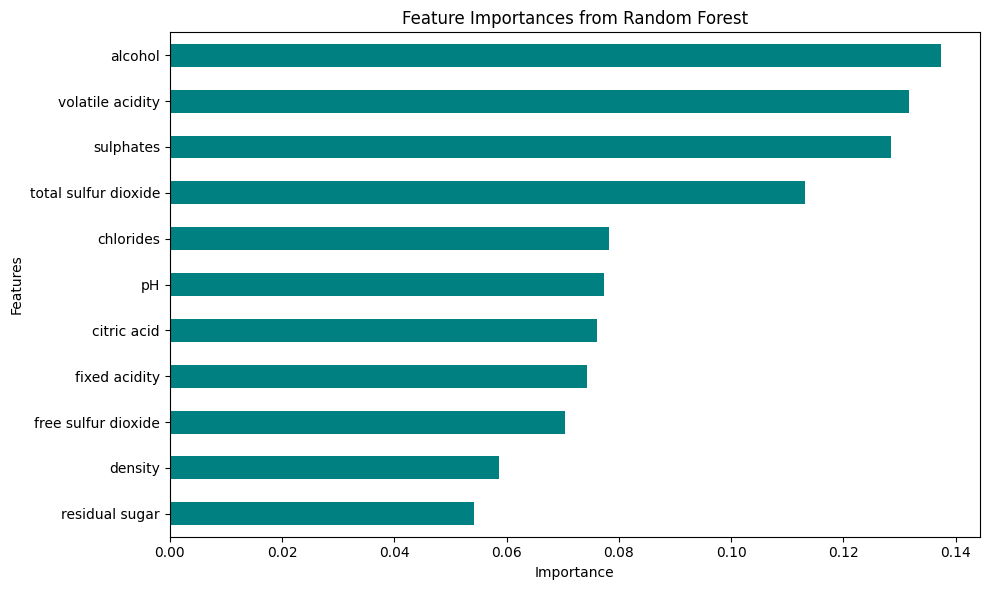

In [ ]:
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='teal')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


#### ROC curve

In [ ]:
classes = [0, 1, 2]  # low, medium, high
y_test_bin = label_binarize(y_test, classes=classes)

In [ ]:
y_score= best_model.predict_proba(X_test)


In [ ]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

c:\Users\AFRAAD-PC1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\AFRAAD-PC1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\AFRAAD-PC1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


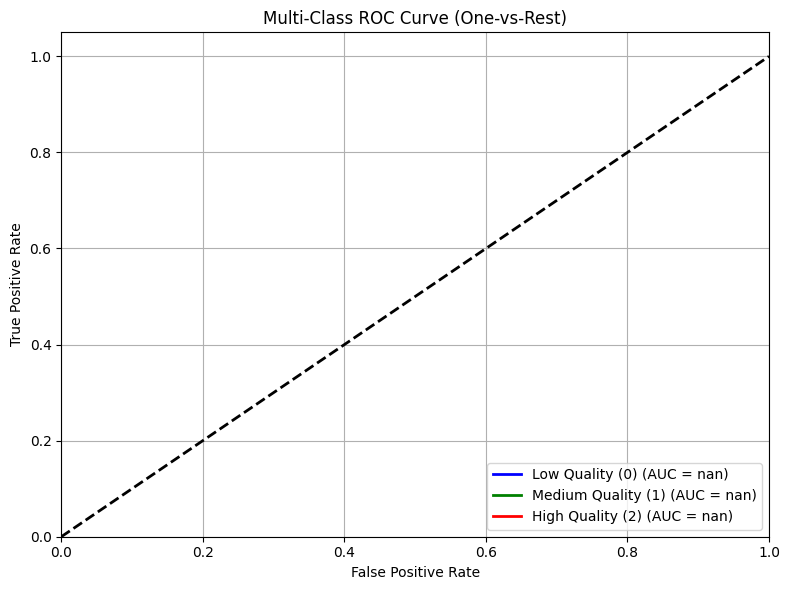

In [ ]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
labels = ['Low Quality (0)', 'Medium Quality (1)', 'High Quality (2)']

for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()